# Homework 2 - Earth's geomagnetic polarity timescale and the Gamma distribution

Earth’s magnetic field varies with time. The most dramatic aspect of this variation is that it reverses its polarity. The field structure in both the normal and reversed states is dipolar (like a bar magnetic), but the pole locations are switched. The timescale that it takes for the field to reverse is relatively short (a few thousand years) compared to the time that it is typically in a given polarity.

<img src="./figures/normal_reversed.png" width = 600>

> Source: Earth’s Dynamic Systems
(10th Edition) Hamblin, W. K. and Christiansen, E. H.


The history of reversals is recorded by the oceanic crust as it forms at the ridge with both sides of the ridge record this pattern of reversals leading to symmetry about the ridge (this is one of the ways we calculate the age of the oceanic crust, something you plotted in homework 1). Both the marine magnetic anomalies and records of the magnetic field on land in sedimentary rocks and lava flows have led to the development of the geomagnetic polarity time scale (GPTS). 

<img src="./figures/GPTS.png" width = 600>

> Source: Gee and Kent (2007) "Source of Oceanic Magnetic Anomalies and the Geomagnetic Polarity Timescale"

## Geomagnetic reversals and the Poisson distribution

Geomagnetic reversals are often interpretted to behave like a Poisson process. Recall from class that a Poisson process meets the following criteria:

- Events are independent of each other.
- The average rate (events per time period) is constant.
- Two events cannot occur at the same time.

In class, we used a Poisson distribution to describe the chance of observing meteors associated with a meteor shower.

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp

**Import the geomagnetic polarity time scale data for the past 40 million years as a pandas dataframe**

The GPTS.csv file, located in the 'data' folder (if on the BerkeleyHub), has a start and end date for each polarity zone along with its polarity.

(1 point)

In [103]:
GPTS = pd.read_csv()  #'data/GPTS.csv')
GPTS.head()

Let's use ```plt.fill()``` to make a plot that looks like the geomagnetic polarity time scale that is shown above. To make such a plot, let's make a list of reversal times when the field switched from normal (1) to reverse (-1) and an accompanying time list that we can then plot:

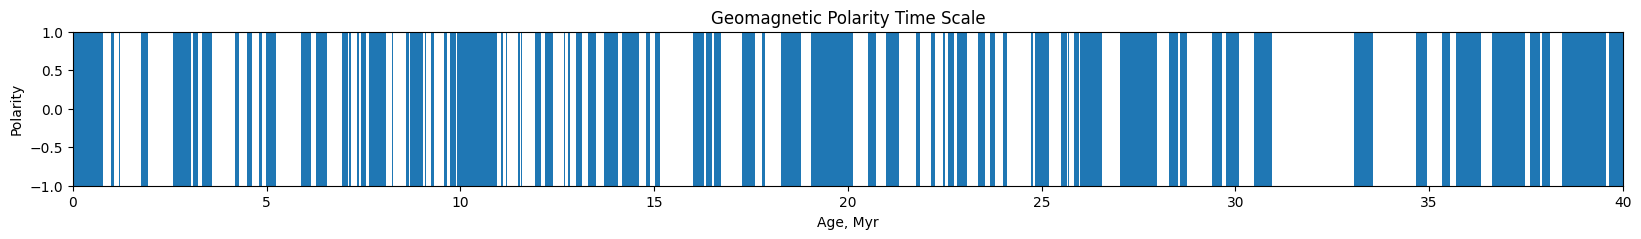

In [3]:
polarity_code = []
time_list = []

for i in GPTS.index:
    if GPTS['Polarity'][i] == 'normal':
        polarity_code.append(-1)
        polarity_code.append(1)
        time_list.append(GPTS['End_Myr'][i])
        time_list.append(GPTS['End_Myr'][i])
    if GPTS['Polarity'][i] == 'reverse':
        polarity_code.append(1)
        polarity_code.append(-1)
        time_list.append(GPTS['End_Myr'][i])
        time_list.append(GPTS['End_Myr'][i])
        
plt.figure(1,(20,2))
plt.fill(time_list,polarity_code)
plt.xlabel('Age, Myr')
plt.ylabel('Polarity')
plt.xlim(0,40)
plt.ylim(-1,1)
plt.title('Geomagnetic Polarity Time Scale')
plt.show()

**Calculate the average duration of a geomagnetic polarity zone.**

To do this you can make a new column in the Dataframe for polarity zone duration where you subtract the start date from the end date.

You can then use ```np.mean()``` to calculate the mean duration, declare a variable named `average_polarity_zone_duration` with the mean polarity duration.

(4 points)

In [104]:
GPTS['Length'] = 
GPTS.head()

In [1]:
average_polarity_zone_duration = np.nanmean() # look up the difference with np.nanmean and np.mean
average_polarity_zone_duration

**How does the duration of the current normal polarity zone compare to the average duration of a polarity (i.e. time between reversals) over the past 40 million years?**

(2 points)

*write your answer here*


**Plot a histogram of the polarity zone duration**

This is an empirical distribution (i.e. it is the observed data). When you make the histogram, make sure that `density=True`

(2 points)

In [2]:
plt.hist()
plt.xlabel('Polarity length (Myrs)')

**What percentile is the polarity zone duration of the current polarity zone?**

If a value is the smallest one (shortest duration), it will have a precentile of 0. If it is the largest one (longest duration), it will have a precentile of 100. The median is 50 percentile. If I have 124 values and the value I am calculating the percentile for is the 119th largest one, it has a percentile of 119/124 = 96th percentile.

There are various ways to determine the percentile. In the worksheet I adapted this from they advised you to sort the data according to polarity zone duration. You can do this by applying the `.sort_values()` function to the Dataframe with the name of your duration column being the input parameter. Also include the parameter `inplace=True` to have it stay sorted. To determine what rank it has you can use the function `.reset_index(inplace=True)` on the dataframe and then find what rank it is which you can then use to calculate the percentile.

However, I think that's not the most effiecient way to do this. What we really need to know is: how many different 'periods' of time are we dealing with (length of the total dataframe) and how many polarity zones have a duration less than the duration of the current polarity zone.

Details on percentile can be found in this inferential thinking chapter:
https://www.inferentialthinking.com/chapters/13/1/Percentiles.html

*Note that the percentile function they refer to is np.percentile*

Declare a variable named `percentile_current_zone` with your answer.

 (4 points)

In [3]:
percentile_current_zone = 
percentile_current_zone

## Can we describe polarity zone duration with a theoretical distribution?

### Gamma distribution:

In class, we discussed the binomial distribution and the Poisson distribution. Another related distribution is the **Gamma distribution**. The **Gamma distribution** is the probability of a given waiting time between Poisson-distributed events (that is an event that randomly occurs but for which is there is an average time period between the events).

The Gamma distribution gives the probability of a waiting time between Poisson distributed events. For those of you that will appreciate the theoretical basis for this function, here it is below. But you will get a better sense of it by putting it into action:

#### Theoretical

Consider the distribution function $D(x)$ of waiting times until the $h\ th$ Poisson event given a Poisson distribution with a rate of change $\lambda$,

$$ D(x) = P (X \le x) = 1 - P(X > x) = 1-\sum_{k=0}^{h-1}\frac{(\lambda x)^{k}e^{-\lambda x}}{k!} = 1-e^{-\lambda x}\sum_{k=0}^{h-1}\frac{(\lambda x)^{k}}{k!} = 1-\frac{\Gamma(h,x\lambda) }{\Gamma (h)}$$ 

where $\Gamma (x) = (x-1)!$ is a complete gamma function and $\Gamma (n,x) = (n-1)! e^{-x}\sum_{k=0}^{n-1}\frac{x^{k}}{k!}$ an incomplete gamma function. The corresponding probability function $P(x)$ of waiting times until the $h\ th$ Poisson event is then obtained by differentiating  $D(x)$,

$$ P(x) = D'(x) = \frac{\lambda (\lambda x)^{h-1}}{(h-1)!}e^{-\lambda x} $$

Now let $\alpha=h$ (not necessarily an integer) and define $\theta=1/\lambda$ to be the time between changes. Then the above equation can be written

$$ P(x) = \frac{x^{\alpha-1}e^{-x/\theta}}{\Gamma (\alpha) \theta^{\alpha}} $$

which is the probability of a duration time $x$ between events.

$\theta$ is the expected time between reversals and we will follow McFadden (1984) and define $\theta = \mu / \alpha$ where $\mu$ is the average chron duration. A value for $\alpha$ greater than one can be interpreted either as an artefact linked to some short intervals missing in the GPTS or to some short term memory within the dynamo that would inhibit a second reversal just after a first one has occurred. McFadden (1984) use a value for $\alpha$ of 1.2.

<img src="./figures/alpha_greater_one.png" width = 600>

> Source: McFadden (1984) "Statistical Tools for the Analysis of Geomagnetic Reversal Sequence"

In [11]:
from scipy.special import gamma
def gamma_probability(x,mu,alpha):
    """
    This function computes the probability waiting x time between poisson events (such as polarity change), 
    given theta the expected time between changes and alpha the shape parameter for the gamma distribution
    
    Parameters
    ----------
    x : the wait time use probability is being investigated
    mu : average polarity zone duration
    alpha : the shape parameter for the gamma distribution (1.2 for the GPTS according to McFadden (1984))
    
    Returns
    -------
    prob : probability of wait time x
    """
    
    theta = mu/alpha
    prob = (x**(alpha - 1) * np.exp(-1*x/theta)) / (gamma(alpha)* theta**alpha)
    
    return prob

**Plot the theoretical gamma probability in comparison to the actual distribution**

Use the `gamma_probability()` function and calculate $P$ the probability of observing a polarity zone for each value in a range ```np.arange(0.0,3.0,0.1)```. Then plot the resulting curve on top of the polarity zone duration histogram. Make sure to label the plotted lines, put on a legend and label the axis. Following McFadden (1984), **use an alpha value of 1.2.**

 (3 point)

In [14]:
gam = gamma_probability(x = , mu= , alpha= )

In [4]:

plt.xlabel('Polarity zone duration (Myr)')

#### Empirical and simulated

The observed GPTS gives us one realization of an theorectical distribution. We can use the function `np.random.gamma` to simulate an empirical distribution.

In [20]:
help(np.random.gamma)

Help on built-in function gamma:

gamma(...) method of numpy.random.mtrand.RandomState instance
    gamma(shape, scale=1.0, size=None)
    
    Draw samples from a Gamma distribution.
    
    Samples are drawn from a Gamma distribution with specified parameters,
    `shape` (sometimes designated "k") and `scale` (sometimes designated
    "theta"), where both parameters are > 0.
    
    .. note::
        New code should use the `~numpy.random.Generator.gamma`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    shape : float or array_like of floats
        The shape of the gamma distribution. Must be non-negative.
    scale : float or array_like of floats, optional
        The scale of the gamma distribution. Must be non-negative.
        Default is equal to 1.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m *

**Use the `np.random.gamma` function to simulate polarity zone**  

`np.random.gamma( )`  has 2 specified parameters: `shape` (sometimes designated "$\alpha$") and `scale` (sometimes designated "$\theta$"), and an optional keyword argument `size` (if `size` is not specified, it returns a single trial). Each call to `np.random.gamma( )` returns a chron duration pulled from the gamma distribution.

So to get random chron lengths use ```np.random.gamma(shape, scale=scale, size=size)``` where: 

- shape = 1.2 (the alpha we used before)
- scale = average_polarity_zone_duration/1.2
- size = number of polarity zones (so we get random simulated data that is the same length as our original data set)

(4 points)

In [21]:
gam_dis = np.random.gamma( , scale = , size = ) # fill in the three variables

**Plot a histogram of the simulated data, the observed data and the theoretical distribution**

They should look pretty similar to each other. Make sure to add labels and a legend.

(3 point)

In [5]:

plt.xlabel('Polarity zone duration (Myr)')
plt.legend()

### Will the field reverse soon?!
But what we _really_ would like to know is how likely is it that a polarity reversal will happen soon. The current normal chron has been going on for 0.78 Myr. To find the probability that a reversal will happen in the next say 10 thousand years we need to find that probability of a chron that is longer than 0.78 Myr but shorter than 0.79 Myr (note, we already know the 'event' hasn't occured in the first 0.78 Myrs). 
$$P (0.78 \le X \le 0.79\ |\ X > 0.78) = \frac{P(X \le 0.79) - P(X \le 0.78)}{P(X > 0.78)}$$

From the equations above, remember that:

$$ P(X \le x) = 1 - \frac{\Gamma(h,x\lambda) }{\Gamma (h)}$$

**Use the code below, and the equations given here to define a ```P_rev_soon``` variable.** Remember $\theta=1/\lambda$ and $\theta = \mu / \alpha$, and we are assuming $ h = \alpha$.

(5 points)

In [6]:
# first we need to use the upper incomplete gamma function from scipy.special (this is what is on the top of the equation above)
from scipy.special import gammaincc

# define our parameters again
alpha = 1.2
mu = average_polarity_zone_duration
theta = 

# with this we can define the probability of a polarity reversal prior to 0.78 Myrs
P_78 =  # gammainc requires the alpha (shape) and the x*lambda parameter

# now do the same for 0.79 Myrs and calculate the P_rev_soon variable
P_79 = 

# finally calculate the probability the reversal is after 0.78 Ma.
P78 = 

P_rev_soon = (P_79-P_78)/P78
P_rev_soon

**Based on this probability, do you think the field is about to reverse?**

(2 points)

*write your answer here*